In [1]:
# Polymorphism

In [2]:
v="abc123"
w=[1,2,3,4,5]
x=('a','b','c','d')
y={1:'a',2:'b',3:'c'}
z={1,1,2}

for thing in [v,w,x,y,z]:
    print(len(thing))

6
5
4
3
2


In [3]:
# how is len able to do this?

In [4]:
v.__len__()

6

In [5]:
for thing in [v,w,x,y,z]:
    print(thing.__len__())

6
5
4
3
2


In [6]:
class Pet:
    def __init__(self):
        self.age = 0
        
    def wait_a_year(self):
        self.age+=1

In [7]:
pet1 = Pet()

In [8]:
pet1.age

0

In [9]:
len(pet1)

TypeError: object of type 'Pet' has no len()

In [10]:
# lets add our magic method __len__

In [11]:
class Pet:
    def __init__(self):
        self.age = 0
        
    def wait_a_year(self):
        self.age+=1
        
    def __len__(self):
        return self.age

In [ ]:
# now lets try our len function again

In [170]:
len(pet1)

TypeError: object of type 'Pet' has no len()

In [ ]:
# what the?

In [ ]:
# remember when we redefine our class (template/blueprint) we must re initialize an object from that new class so it will have all of those new properties

In [174]:
pet1 = Pet()

In [175]:
len(pet1)

0

In [ ]:
# lets see if it updates...

In [176]:
pet1.wait_a_year()

In [177]:
len(pet1)

1

In [178]:
for i in range(7):
    pet1.wait_a_year()

In [179]:
len(pet1)

8

In [ ]:
# so now we can toss our newly created object into our list we were using before and it will work just like all the other objects

In [180]:
v="abc123"
w=[1,2,3,4,5]
x=('a','b','c','d')
y={1:'a',2:'b',3:'c'}
z={1,1,2}

for thing in [v,w,x,y,z,pet1]:
    print(len(thing))
    

6
5
4
3
2
8


In [181]:
# so long as an object has a __len__ magic method defined then you can use the len function on it

# Magic Methods
---

In [182]:
# a set of preset methods which begin and end with __ (double underscore), also known as dunder

In [183]:
# magic methods are called for you, they are not meant to be explicitly called

In [184]:
# so far we have done init and len, what else is there?

In [185]:
# there are actually a lot of magic methods that we have been invoking without knowing it

In [186]:
lst = [1,2,3]
lst[1]

2

In [187]:
lst.__getitem__(1)

2

In [188]:
# so this means if we want to add this functionality to our own objects, we just need to define the getitem magic method

In [189]:
class Pet:
    def __init__(self,name):
        self.name = name
        self.age = 0
        self.eaten = []
        
    def eat(self, food_item):
        print("{} just at a {}".format(self.name,food_item))
        self.eaten.append(food_item)

    def wait_a_year(self):
        self.age+=1
        
    def __len__(self):
        return self.age
    
    def __getitem__(self, item):
        return self.eaten[item]

In [190]:
pet1 = Pet("Sparky")

In [191]:
vars(pet1)

{'age': 0, 'eaten': [], 'name': 'Sparky'}

In [192]:
pet1.eat("banana")

Sparky just at a banana


In [193]:
lst_of_food = ['banana','dog bone','can of tuna','piece of chocolate cake', 'carrot', 'steak']
for item in set(lst_of_food):
    pet1.eat(item)

Sparky just at a carrot
Sparky just at a can of tuna
Sparky just at a banana
Sparky just at a steak
Sparky just at a dog bone
Sparky just at a piece of chocolate cake


In [194]:
pet1.eaten

['banana',
 'carrot',
 'can of tuna',
 'banana',
 'steak',
 'dog bone',
 'piece of chocolate cake']

In [195]:
pet1[0]

'banana'

In [196]:
pet1.__getitem__(0)

'banana'

In [44]:
pet1[3]
pet1[5]

'steak'

In [ ]:
# How many times did I invoke the __getitem__ method in the above cell?

In [ ]:
# 4

In [198]:
class Pet:
    def __init__(self,name):
        self.name = name
        self.age = 0
        self.eaten = []
        
    def eat(self, food_item):
        print("{} just at a {}".format(self.name,food_item))
        self.eaten.append(food_item)

    def wait_a_year(self):
        self.age+=1
        
    def __len__(self):
        return self.age
    
    def __getitem__(self, item):
        return self.eaten[item]
    
    def __setitem__(self, item, val):
        print("Changing the {} to a {}".format(self.eaten[item],val))
        self.eaten[item] = val

In [199]:
pet1 = Pet("Sparky")

In [200]:
lst_of_food = ['banana','dog bone','can of tuna','piece of chocolate cake', 'carrot', 'steak']
for item in lst_of_food:
    pet1.eat(item)

Sparky just at a banana
Sparky just at a dog bone
Sparky just at a can of tuna
Sparky just at a piece of chocolate cake
Sparky just at a carrot
Sparky just at a steak


In [201]:
pet1[1] = "pig ear"

Changing the dog bone to a pig ear


In [202]:
pet1.eaten

['banana',
 'pig ear',
 'can of tuna',
 'piece of chocolate cake',
 'carrot',
 'steak']

In [ ]:
# now lets move on to another class, we will make a class for a point (a point in the cartesian plane)

In [ ]:
# a point is just an x and a y value

In [203]:
import matplotlib.pyplot as plt

In [204]:
class Point:
    def __init__(self, x , y):
        self.x = x
        self.y = y

In [205]:
p1 = Point(1,2)

In [206]:
p1

In [207]:
# ^ thats ugly, so lets fix it

In [208]:
class Point:
    def __init__(self, x , y):
        self.x = x
        self.y = y
        
    def __repr__(self):
        return "Point({},{})".format(self.x,self.y)

In [209]:
p1 = Point(1,2)
p1

Point(1,2)

In [210]:
# repr should be a representation of how to create this object

In [211]:
# if you want a more thorough or differently printed representation, you should use __str__

In [212]:
class Point:
    def __init__(self, x , y):
        self.x = x
        self.y = y
        
    def __repr__(self):
        return "Point({},{})".format(self.x,self.y)
        
    def __str__(self):
        return "A point with x={} and y={}".format(self.x,self.y)

In [213]:
p1 = Point(1,2)
p1

Point(1,2)

In [214]:
print(p1)

A point with x=1 and y=2


In [ ]:
# notice what happens if I remove the str magic method from my class

In [ ]:
# when an object is passed to the print function, python will first look to see if the str magic method is defined, if it is, it will use that, otherwise it will use the repr magic method

In [ ]:
# we could go all out and print a graphical representation of the point in the cartesian coordiante system

In [215]:
class Point:
    def __init__(self, x , y):
        self.x = x
        self.y = y
        
    def __repr__(self):
        return 'Point({},{})'.format(self.x,self.y)
        
    def __str__(self):
        point_title = self.__repr__()
        plt.scatter(self.x,self.y)
        plt.title(point_title)
        plt.show()
        return "A point with x={} and y={}".format(self.x,self.y)

In [216]:
p1 = Point(0,0)

In [217]:
p1

Point(0,0)

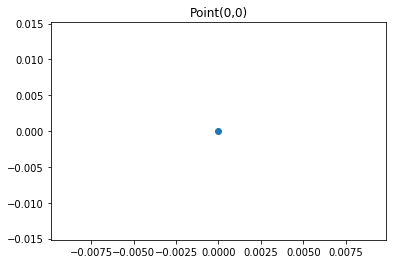

A point with x=0 and y=0


In [218]:
print(p1)

In [219]:
p1 = Point(0,0)
p2 = Point(1,2)
p3 = Point(0,0)

In [220]:
p1 == p2

False

In [221]:
p2 == p3

False

In [222]:
p1 == p3

False

In [ ]:
# so lets fix this and add this functionality via the __eq__ magic method

In [223]:
class Point:
    def __init__(self, x , y):
        self.x = x
        self.y = y
        
    def __repr__(self):
        return 'Point({},{})'.format(self.x,self.y)
        
    def __str__(self):
        point_title = self.__repr__()
        plt.scatter(self.x,self.y)
        plt.title(point_title)
        plt.show()
        return "A point with x={} and y={}".format(self.x,self.y)
    
    def __eq__(self,other):
        return self.x == other.x and self.y == other.y

In [224]:
p1 = Point(0,0)
p2 = Point(1,2)
p3 = Point(0,0)

In [225]:
print(p1==p2)
print(p2==p3)
print(p1==p3)

False
False
True


In [226]:
p1 == p2
p1.__eq__(p2)

False

In [ ]:
# there are also magic methods for > >= < <= !=

In [ ]:
# the bool function in python works the same way that len works, it calls the __bool__ magic method of the object that was passed as an argument

In [227]:
class Point:
    def __init__(self, x , y):
        self.x = x
        self.y = y
        
    def __repr__(self):
        return 'Point({},{})'.format(self.x,self.y)
        
    def __str__(self):
        point_title = self.__repr__()
        plt.scatter(self.x,self.y)
        plt.title(point_title)
        plt.show()
        return "A point with x={} and y={}".format(self.x,self.y)
    
    def __eq__(self,other):
        return self.x == other.x and self.y == other.y
    
    def __bool__(self,):
        return self.x == 0 and self.y == 0

In [228]:
p1 = Point(0,0)
p2 = Point(1,2)
p3 = Point(0,1)
p4 = Point(4,0)
print(bool(p1))
print(bool(p2))
print(bool(p3))
print(bool(p4))

True
False
False
False


In [ ]:
#  now lets implement a distance method for points

In [229]:
class Point:
    def __init__(self, x , y):
        self.x = x
        self.y = y
        
    def __repr__(self):
        return 'Point({},{})'.format(self.x,self.y)
        
    def __str__(self):
        point_title = self.__repr__()
        plt.scatter(self.x,self.y)
        plt.title(point_title)
        plt.show()
        return "A point with x={} and y={}".format(self.x,self.y)
    
    def __eq__(self,other):
        return self.x == other.x and self.y == other.y
    
    def __bool__(self,):
        return self.x == 0 and self.y == 0
    
    def distance(self,other):
        return ((self.x - other.x)**2 + (self.y-other.y)**2) **.5

In [230]:
p1 = Point(0,0)
p2 = Point(0,1)
p3 = Point(3,4)

In [231]:
p2.distance(p3)

4.242640687119285

In [232]:
p1.distance(p2)

1.0

In [233]:
p1.distance(p3)

5.0

In [234]:
# cool, now lets make a line

In [235]:
# what is a line? a line is just 2 points

In [236]:
class Line:
    def __init__(self, point1, point2):
        self.p1 = point1
        self.p2 = point2
    
    def __repr__(self):
        return 'Line({},{})'.format(self.p1.__repr__(), self.p2.__repr__())
    
    def __str__(self):
        return 'Line is comprised of {} and {}'.format(self.p1.__repr__(), self.p2.__repr__())

In [237]:
line1 = Line(p1,p2)

In [238]:
line1

Line(Point(0,0),Point(0,1))

In [239]:
print(line1)

Line is comprised of Point(0,0) and Point(0,1)


In [240]:
# what is the length of a line?

In [241]:
from math import ceil

In [242]:
class Line:
    def __init__(self, point1, point2):
        self.p1 = point1
        self.p2 = point2
    
    def __repr__(self):
        return 'Line({},{})'.format(self.p1.__repr__(), self.p2.__repr__())
    
    def __str__(self):
        return 'Line is comprised of {} and {}'.format(self.p1.__repr__(), self.p2.__repr__())
    
    def length(self):
        return self.p1.distance(self.p2) 
    
    def __len__(self):
        return ceil(self.length())

In [243]:
p2 = Point(1,1)

In [244]:
line1 = Line(p1,p2)

In [245]:
line1

Line(Point(0,0),Point(1,1))

In [246]:
line1.length()

1.4142135623730951

In [247]:
len(line1)

2

In [ ]:
# lets plot our line

In [248]:
class Line:
    def __init__(self, point1, point2):
        self.p1 = point1
        self.p2 = point2
    
    def __repr__(self):
        return 'Line({},{})'.format(self.p1.__repr__(), self.p2.__repr__())
    
    def __str__(self):
        return 'Line is comprised of {} and {}'.format(self.p1.__repr__(), self.p2.__repr__())
    
    def length(self):
        return self.p1.distance(self.p2) 
    
    def __len__(self):
        return ceil(self.length())
    
    def display(self):
        display_title = self.__repr__()
        plt.plot([self.p1.x,self.p2.x],[self.p1.y,self.p2.y])
        plt.title(display_title)
        plt.show()

In [249]:
line1 = Line(p1,p2)

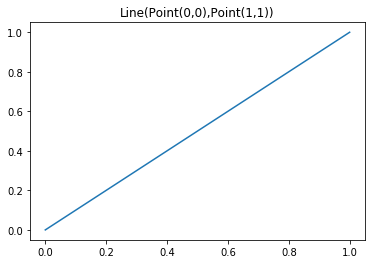

In [250]:
line1.display()

In [ ]:
# add on a way to compare lines (make longer lines greater than shorter)

In [ ]:
# make a triangle class

In [ ]:
if x > 7 or 5 or 9:
    print("its bigger than 5 7 or 9")

In [ ]:
if fan in ("Yes","Yep","yes"):
    print("its bigger than 5 7 or 9")

In [251]:
3 + 4

7

In [252]:
(3).__add__(4)

7

In [253]:
4 + 3

7

In [254]:
(4).__add__(3)

7

In [255]:
"abc"*3

'abcabcabc'

In [256]:
3*"abc"

'abcabcabc'

In [127]:
def get_strings_end_with(sent, letter):
    low = sent.split()
    out = []
    for word in low:
        word = word.strip(",.!:?")
        if letter == word[-len(letter):]:
            out.append(word)
    return out

In [257]:
get_strings_end_with('Hows! yours day today?','ay')

['day', 'today']

In [258]:
from collections import defaultdict

In [259]:
dd = defaultdict(abc)

In [261]:
# defaultdict(function)

In [262]:
def abc():
    return "abc"

In [263]:
len(dd)

0

In [264]:
dd["a"]

'abc'

In [265]:
dict(dd)

{'a': 'abc'}

In [268]:
# dd["a"].append(6)

In [269]:
from collections import Counter

In [270]:
import math as m

In [273]:
# m.

In [274]:
a = b = []

In [275]:
a

[]

In [276]:
Counter("sadmnvbkIMPORdsjfhglkasdjnvhkasdjhfalds")

Counter({'I': 1,
         'M': 1,
         'O': 1,
         'P': 1,
         'R': 1,
         'a': 4,
         'b': 1,
         'd': 5,
         'f': 2,
         'g': 1,
         'h': 3,
         'j': 3,
         'k': 3,
         'l': 2,
         'm': 1,
         'n': 2,
         's': 5,
         'v': 2})

In [280]:
a = b = []
b.append(3)

In [281]:
a

[3]

In [282]:
a, b = [], []